# Introduction

In this course, we explored the business context in which data science happens. You'll now have a chance to apply what you've learned in a more relaxed way. Feel free to explore alternatives to the path we're taking in this project.

In this scenario, you're working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms like Dataquest.

You're tasked with figuring out what is best content to write about. Because you took this course, you know that given the lack of instructions there's some leeway in what "best" means here.

Since you're passionate about helping people learn, you decide to scour the internet in search for the answer to the question "What is it that people want to learn about in data science?" (as opposed to determining the most profitable content, for instance).

Thinking back to your experience when you first started learning programming, it occurs to you that if you wanted to figure out what programming content to write, you could consult Stack Overflow (a question and answer website about programming) and see what kind of content is more popular.

You decide to investigate Stack Overflow a little more and find out that it is part of a question and answer website network called Stack Exchange.

<img src=https://dq-content.s3.amazonaws.com/469/se-logo.png>

# Stack Exchange

Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science! Here's a sample of the most popular sites:

<img src=https://dq-content.s3.amazonaws.com/469/se_sites.png>

Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

If you're not familiar with Stack Overflow or any other Stack Exchange site, you can check out this tour.

Being a multidisciplinary field, there a few Stack Exchange websites there are relevant to our goal here:

- Data Science
- Cross Validated — a statistics site
- Artificial Intelligence
- Mathematics
- Stack Overflow

And if we want to include Data Engineering, we can also consider:
- Database Administrators;
- Unix & Linux;
- Software Engineering;

If you open the link in the image shared above, you'll find a complete list of Stack Exchange websites sorted by percentage of questions that received answers. At the time of this writing, Data Science Stack Exchange (DSSE) is on the bottom 10 sites with respect to this metric.

The fact that DSSE is a data science dedicated site (contrarily to the others), coupled with it having a lot of unanswered questions, makes it an ideal candidate for this investigation. DSSE will be the focus of this guided project.

In this screen you'll be doing your first off-Dataquest exercise!

## Instructions
1. If you're not familiar with any Stack Exchange website, take the time to explore one of them. Try to answer a few of these questions in a markdown cell:
- What kind of questions are welcome on this site?
- What, other than questions, does the site's home subdivide into?
    - Does any of them look useful towards our goal?
- What information is available in each post?
2. Explore some of the questions that were asked.
3. Try asking a couple of questions on any of Stack Exchange sites to get a better feel for how the sites operate.

### What kind of questions are welcome on this site?
On DSSE's help center's section on questions , we can read that we should:
- Avoid subjective questions.
- Ask practical questions about Data Science — there are adequate sites for theoretical questions.
- Ask specific questions.
- Make questions relevant to others.

All of these characteristics, if employed, should be helpful attributes to our goal.

In the help center we also learned that in addition to the sites mentioned in the Learn section, there are other two sites that are relevant:
- Open Data (Dataset requests)
- Computational Science (Software packages and algorithms in applied mathematics)

### What, other than questions, does DSSE's home subdivide into?
On the home page we can see that we have four sections:
- Questions — a list of all questions asked;
- Tags — a list of tags (keywords or labels that categorize questions);

<img src=https://camo.githubusercontent.com/e2a2cb70d1bdc388fbe75352bfddb52ed400973f7544b02f5ec9f4f3b7fd8ec7/68747470733a2f2f64712d636f6e74656e742e73332e616d617a6f6e6177732e636f6d2f3436392f746167735f64732e706e67>
- Users — a list of users;
- Unanswered — a list of unanswered questions;

The tagging system used by Stack Exchange looks just like what we need to solve this problem as it allow us to quantify how many questions are asked about each subject.

Something else we can learn from exploring the help center, is that Stack Exchange's sites are heavily moderated by the community; this gives us some confidence in using the tagging system to derive conclusions.

### What information is available in each post?
Looking, just as an example, at this question, some of the information we see is:
- For both questions and answers:
    - The posts's score;
    - The posts's title;
    - The posts's author;
    - The posts's body;
- For questions only:
    - How many users have it on their "
    - The last time the question as active;
    - How many times the question was viewed;
    - Related questions;
    - The question's tags;


# Stack Exchange Data Explorer

After a spending some time investigating the website, you decide that the tags will be very useful in categorizing content, saving you the trouble of you having to do it yourself.

Now comes the challenge of accessing the data en masse. One potential solution would be to scrape the site. However, because we still haven't learned how to web scrape, and because we have an easier alternative (mostly the second reason), we're going to do something else.

Stack Exchange provides a public data base for each of its websites. Here's a link to query and explore Data Science Stack Exchange's database.

You can read more about Stack Exchange Data Explorer (SEDE) on its help section and on this tutorial link.

<img src=https://dq-content.s3.amazonaws.com/469/dsde.png>

In the image above we can see the names of each of the tables in the database. Clicking on the names will expand to show the columns of each table.

The gif below shows how we can run the query SELECT * FROM tags;.

<img src=https://dq-content.s3.amazonaws.com/469/run_query.gif>

Note that SEDE uses a different dialect (Transact-SQL — Microsoft's SQL) than SQLite , which you learned earlier. Most things are the same, but some are different. For instance, the query below selects the top 10 results from a query.

        SELECT TOP 10 *
          FROM tags
         ORDER BY Count DESC;
         
In SQLite we would not only use the keyword LIMIT instead of TOP we would also included it at the end of the query, instead of in the SELECT statement. If you run into any issues due to these differences, try to research on your own how to solve them. Here's a helpful resource.

# Getting the Data

The posts table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal:
- Id: An identification number for the post.
- PostTypeId: An identification number for the type of post.
<img src=https://dq-content.s3.amazonaws.com/469/PostTypes.png>
- CreationDate: The date and time of creation of the post.
- Score: The post's score.
- ViewCount: How many times the post was viewed.
- Tags: What tags were used.
- AnswerCount: How many answers the question got (only applicable to question posts).
- FavoriteCount: How many times the question was favored (only applicable to question posts).

Note that with the exception of the tags column, the last few columns contain information about how popular the post is — the kind of information we're after.

There are eight different types of post. Before we try to figure out which of them are relevant to us, let's check how many of them there are:

        SELECT PostTypeId, COUNT(*) as NrOfPosts
          FROM posts
         GROUP BY PostTypeId;
 
PostTypeId|	NrOfPosts
-------------|-------
1	|21446
2	|23673
4	|236
5	|236
6	|11
7	|1

Due to their low volume, anything that isn't questions or answers is mostly inconsequential. Even if it happens to be the case that such kind of posts is immensely popular, they would just be outliers and not relevant to us. We'll then just focus on the questions.

Since we're only interested in recent posts, we'll limit our analysis to the posts of 2019. (At the time of writing it is early 2020).

The dataset we'll be using in this guided project is one resulting from a possible solution to the following exercise.

To get the relevant data we run the following query.

        SELECT Id, CreationDate,
               Score, ViewCount, Tags,
               AnswerCount, FavoriteCount
          FROM posts
         WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;
         
Here's what the first few rows look like:

Id   |PostTypeId|CreationDate      |Score   |ViewCount|Tags|AnswerCount	|FavoriteCount
-----|----------|------------------|--------|---------|----|------------|-------------
44419|1         |2019-01-2309:21:13|1       |21       |0   |            |	
44420	|1|	2019-01-23 09:34:01|	0|	25|		0	||
44423	|1|	2019-01-23 09:58:41|	2|	1651|		0||	
44427	|1|	2019-01-23 10:57:09|	0|	55|		1	||
44428	|1|	2019-01-23 11:02:15|	0|	19|		0	||

# Exploring the Data

The result of the query was stored in a file called 2019_questions.csv. Here are the first few rows of the data we got:

    Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
    "44419","1","2019-01-23 09:21:13","1","21","<machine-learning><data-mining>","0",""
    "44420","1","2019-01-23 09:34:01","0","25","<machine-learning><regression><linear-regression><regularization>","0",""
    "44423","1","2019-01-23 09:58:41","2","1651","<python><time-series><forecast><forecasting>","0",""
    "44427","1","2019-01-23 10:57:09","0","55","<machine-learning><scikit-learn><pca>","1",""
    "44428","1","2019-01-23 11:02:15","0","19","<dataset><bigdata><data><speech-to-text>","0",""
    </speech-to-text></data></bigdata></dataset></pca></scikit-learn></machine-learning></forecasting></forecast></time-series></python></regularization></linear-regression></regression></machine-learning></data-mining></machine-learning>
    
Looking at the of each row, it stands out that FavouriteCount has missing values. What other issues are there with the data? Let's explore it.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


We see that only FavoriteCount has missing values. A missing value on this column probably means that the question was is not present in any users' favorite list, so we can replace the missing values with zero.

The types seem adequate for every column, however, after we fill in the missing values on FavoriteCount, there is no reason to store the values as floats.

Since the object dtype is a catch-all type, let's see what types the objects in questions["Tags"] are.


In [5]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

In [6]:
questions["Tags"]

0                         <machine-learning><data-mining>
1       <machine-learning><regression><linear-regressi...
2            <python><time-series><forecast><forecasting>
3                   <machine-learning><scikit-learn><pca>
4                <dataset><bigdata><data><speech-to-text>
                              ...                        
8834      <pca><dimensionality-reduction><linear-algebra>
8835                       <keras><weight-initialization>
8836                     <python><visualization><seaborn>
8837                                        <time-series>
8838                                               <k-nn>
Name: Tags, Length: 8839, dtype: object

We see that every value in this column is a string. On Stack Exchange, each question can only have a maximum of five tags (source), so one way to deal with this column is to create five columns in questions called Tag1, Tag2, Tag3, Tag4, and Tag5 and populate the columns with the tags in each row.

However, since doesn't help is relating tags from one question to another, we'll just keep them as a list.

# Cleaning the Data

On the previous screen, we identified issues with the data. Fortunately for us, the folks at Stack Exchange did a great job of providing clean data. Let's fix the one issue we found, set the appropriate types for the columns, and clean the Tags column to fit our purposes.

At the end of this screen, the types of the columns should be as follows.

        Id                        int64
        CreationDate     datetime64[ns]
        Score                     int64
        ViewCount                 int64
        Tags                     object
        AnswerCount               int64
        FavoriteCount             int64

The values in the Tags column are strings that look like this:

        "<machine-learning><regression><linear-regression><regularization>"
        </regularization></linear-regression></regression></machine-learning>

We'll want to transform this string in something more suitable to use typical string methods. Our goal will be to transform strings like the above in something like:

        "machine-learning,regression,linear-regression,regularization"

We can then split on , to obtain a list.

We'll begin by fixing FavoriteCount.


In [7]:
questions.fillna(value={"FavoriteCount": 0}, inplace=True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

In [8]:
# Let's now modify Tags to make it easier to work with.
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
questions.sample(8)

/var/folders/57/05cp9bfn4450_hcf9fb_7pf40000gn/T/ipykernel_39391/846404497.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")


,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
1698,57757,2019-08-18 17:28:41,0,10,"[machine-learning, python, cnn, pytorch, faste...",0,0
473,56327,2019-07-24 18:24:49,0,21,"[machine-learning, python, time-series, statis...",0,0
3841,49356,2019-04-15 22:42:21,0,7,"[statistics, decision-trees, probability, asso...",0,0
1008,56885,2019-08-03 11:26:24,2,64,"[cnn, batch-normalization]",1,0
4630,61982,2019-10-20 09:51:40,0,10,"[keras, regression, multi-output]",0,0
4795,61440,2019-10-08 15:45:18,1,137,"[classification, scikit-learn, decision-trees,...",2,0
2448,47540,2019-03-18 16:42:57,1,23,"[deep-learning, cnn]",0,0
4171,49494,2019-04-17 18:22:12,0,26,"[deep-learning, classification, tensorflow, na...",0,0


# Most Used and Most Viewed
We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

We could take into account the score, or whether or not a question is part of someone's favorite questions. These are all reasonable options to investigate; but we'll limit the focus of our research to counts and views for now.

In [9]:
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [10]:
# For improved aesthetics, let's transform tag_count in a dataframe.
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(10)

,Count
machine-learning,2693
data-mining,217
regression,347
linear-regression,175
regularization,50
python,1814
time-series,466
forecast,34
forecasting,85
scikit-learn,540


In [11]:
# Let's now sort this dataframe by Count and visualize the top 20 results.
most_used = tag_count.sort_values(by="Count").tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


<AxesSubplot:>

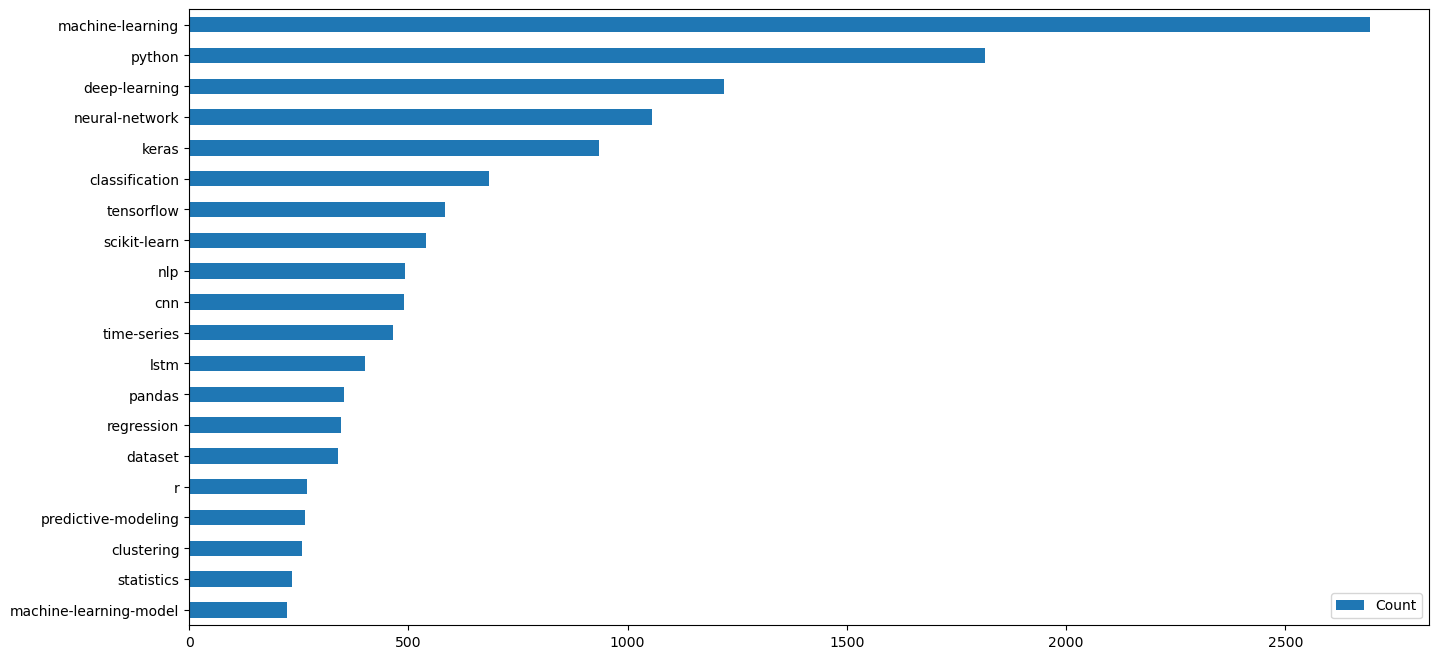

In [12]:
most_used.plot(kind="barh", figsize=(16,8))


Some tags are very, very broad and are unlikely to be useful; e.g.: python, dataset, r. Before we investigate the tags a little deeper, let's repeat the same process for views.

We'll use pandas's pandas.DataFrame.iterrows().

<AxesSubplot:>

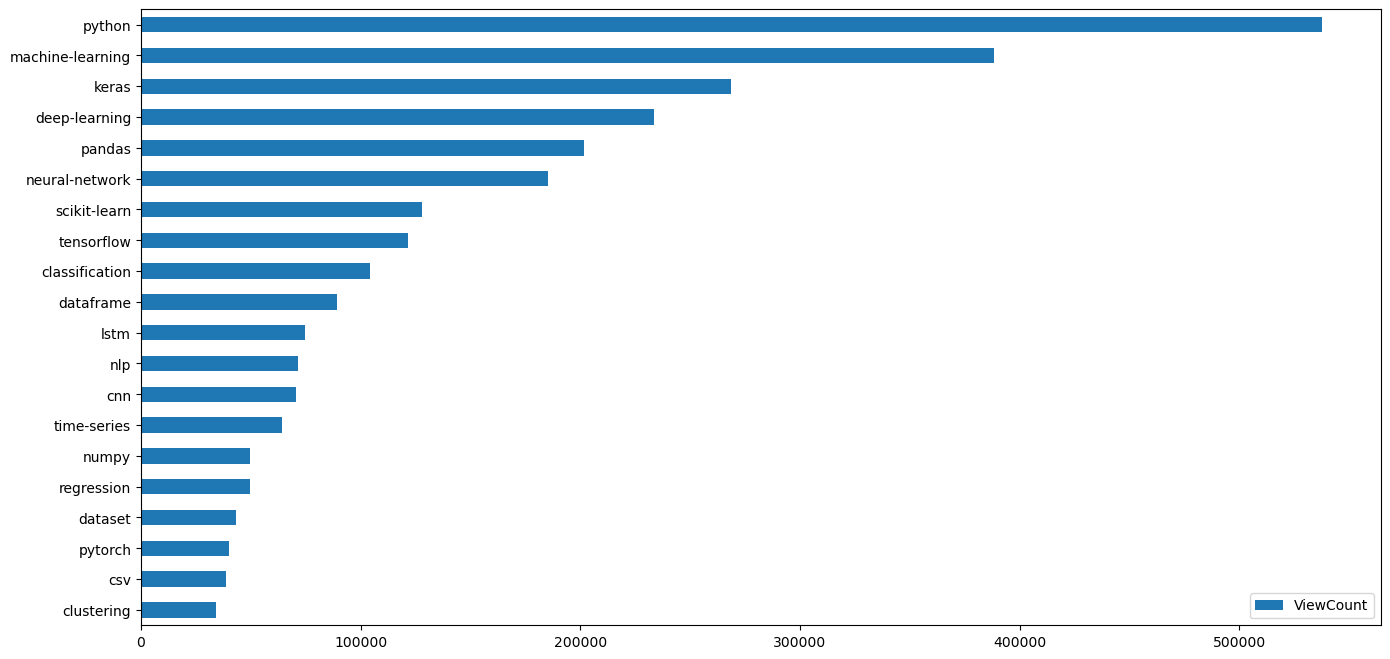

In [14]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row["Tags"]:
        if tag in tag_view_count:
            tag_view_count[tag] += row["ViewCount"]
        else:
            tag_view_count[tag] = row["ViewCount"]
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)
most_viewed.plot(kind="barh", figsize=(16,8))

array([<AxesSubplot:title={'center':'ViewCount'}>], dtype=object)

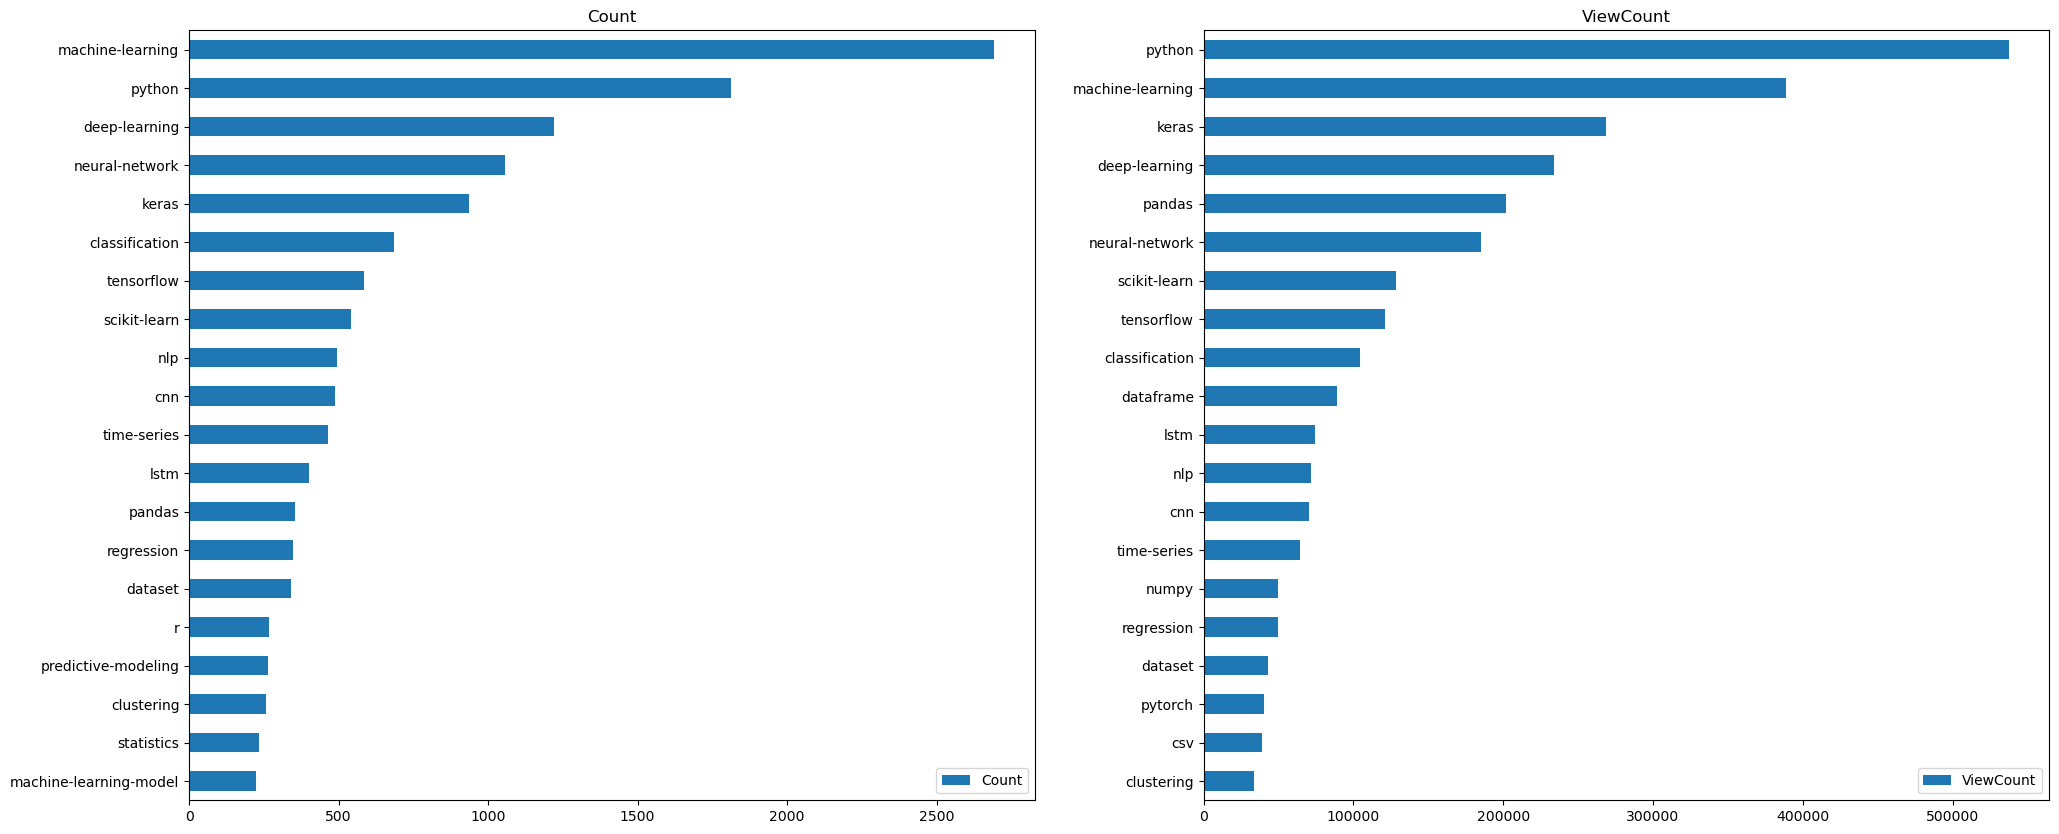

In [15]:
# Let's see them side by side.

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

In [16]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

# Relations Between Tags

On this screen
- most_used is a dataframe that counts how many times each of the top 20 tags was used.
- most_viewed is a dataframe that counts how many times each of the top 20 tags was viewed.

Looking at the results from the last exercise, we see that most top tags are present in both dataframes.

Let's see what tags are in most_used, but not in most_viewed. We can identify them by the missing values in ViewCount below.

In [17]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used

,Count,ViewCount
machine-learning-model,224,NaN
statistics,234,NaN
clustering,257,33928.0
predictive-modeling,265,NaN
r,268,NaN
dataset,340,43151.0
regression,347,49451.0
pandas,354,201787.0
lstm,402,74458.0
time-series,466,64134.0


Similarly, let's see what tags are in the latter, but not the former:

In [18]:
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)
in_viewed

,Count,ViewCount
clustering,257.0,33928
csv,NaN,38654
pytorch,NaN,40240
dataset,340.0,43151
regression,347.0,49451
numpy,NaN,49767
time-series,466.0,64134
cnn,489.0,70349
nlp,493.0,71382
lstm,402.0,74458


The tags present in most_used and not present in most_viewed are:
- machine-learning-model
- statistics
- predictive-modeling
- r

And the tags present in most_viewed but not in most_used are:
- csv
- pytorch
- dataframe

Some tags also stand out as being related. For example, python is related to pandas, as we can find both pythons and pandas in the same country — or better yet, because pandas is a Python library. So by writing about pandas, we can actually simultaneously tackle two tags.

Other pairs of tags, shouldn't be related at all, like pandas and r:

In [19]:
questions[questions["Tags"].apply(
    lambda tags: True if "r" in tags and "pandas" in tags else False)
]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
2873,60074,2019-09-11 20:35:17,0,22,"[r, pandas, dplyr]",0,0
3651,49148,2019-04-11 19:41:39,1,83,"[r, data-mining, pandas, matlab, databases]",3,0


Just two results. You can look at these questions by replacing ID in https://datascience.stackexchange.com/questions/ID with the questions' Ids values and see what they are about.

One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together. Let's do this.

In [20]:
all_tags = list(tag_count.index)
all_tags

['machine-learning',
 'data-mining',
 'regression',
 'linear-regression',
 'regularization',
 'python',
 'time-series',
 'forecast',
 'forecasting',
 'scikit-learn',
 'pca',
 'dataset',
 'bigdata',
 'data',
 'speech-to-text',
 'fuzzy-logic',
 'anomaly-detection',
 'online-learning',
 'matrix-factorisation',
 'correlation',
 'naive-bayes-classifier',
 'deep-learning',
 'keras',
 'cnn',
 'theory',
 'gradient-descent',
 'nlp',
 'clustering',
 'feature-extraction',
 'encoding',
 'embeddings',
 'pandas',
 'numpy',
 'decision-trees',
 'accuracy',
 'matlab',
 'reinforcement-learning',
 'q-learning',
 'policy-gradients',
 'neural-network',
 'image-classification',
 'r',
 'logistic-regression',
 'predictive-modeling',
 'lstm',
 'tensorflow',
 'gpu',
 'data-cleaning',
 'object-detection',
 'recommender-system',
 'supervised-learning',
 'similarity',
 'text-mining',
 'word-embeddings',
 'machine-learning-model',
 'xgboost',
 'apache-spark',
 'classification',
 'gaussian',
 'deepmind',
 'training'

In [23]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,machine-learning,data-mining,regression,linear-regression
machine-learning,NaN,NaN,NaN,NaN
data-mining,NaN,NaN,NaN,NaN
regression,NaN,NaN,NaN,NaN
linear-regression,NaN,NaN,NaN,NaN


We will now fill this dataframe with zeroes and then, for each lists of tags in questions["Tags"], we will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [24]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

In [29]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


The cells highlighted in yellow tell us that time-series was used together with r 22 times. The values in blue tell us how many times each of the tags was used. We saw earlier that machine-learning was used 2693 times and we confirm it in this dataframe.

It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap. But before we do it, let's get rid of the values in blue, otherwise the colors will be too skewed.

In [30]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

/var/folders/57/05cp9bfn4450_hcf9fb_7pf40000gn/T/ipykernel_39391/1578393792.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  relations_most_used.iloc[i,i] = pd.np.NaN


<AxesSubplot:>

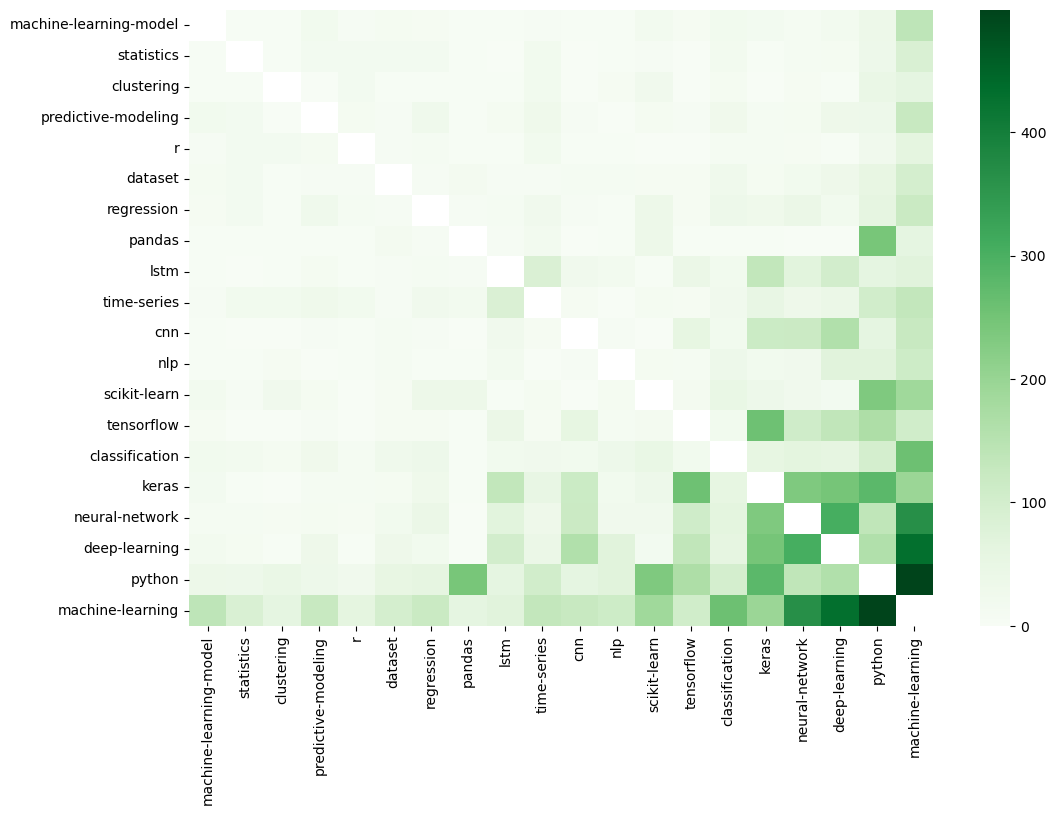

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

So how do we attack both these problems? There is a powerful data mining technique that allows us to handle this: association rules. Association rules allow us to analytically spot relations like "people who purchase milk, also purchase eggs". Moreover, we can also measure how strong this relations are on several fronts: how common the relation is, how strong it is, and how independent the components of the relationship are (toilet paper and bread are probably more independent than eggs and milk — you'll learn more about statistical independence in the next step).

We won't get into the details of it, as the technique is out of scope for this course, but it is a path worth investigating!

# Enter Domain Knowledge

Although analytical solutions to the problem set forth in the previous screen exist, they aren't necessarily needed, nor the best way to go about solving the problem.

Domain knowledge can be very useful. Let's see how it can help us here.

You may have noticed that the most used tags are also the most viewed. From the top 10 tags of each, here's a list of the tags in common: python, machine-learning, deep-learning, neural-network, keras, tensorflow, classification, scikit-learn.

Do you know what each of these or most of these tags means? Could there be strong relations between them?

Keras, scikit-learn, TensorFlow are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

## Just a Fad?

Before we officially make our recommendation, it would be nice to solidify our findings with additional proof. More specifically, one thing that comes to mind is "Is deep learning just a fad?" Ideally, the content we decide to create will be the most useful for as long as possible. Could interest in deep learning be slowing down? Back to SEDE!

The file all_questions.csv holds the result of the query below — this query fetches all of the questions ever asked on DSSE, their dates and tags.

        SELECT Id, CreationDate, Tags
          FROM posts
         WHERE PostTypeId = 1;

In this we will track the interest in deep learning across time. We will:
- Count how many deep learning questions are asked per time period.
- The total amount of questions per time period.
- How many deep learning questions there are relative to the total amount of questions per time period.

Let's read in the file into a dataframe called all_q. We'll parse the dates at read-time.

In [32]:
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])
all_q

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...
...,...,...,...
21571,36971,2018-08-15 14:19:01,<statistics><data>
21572,36974,2018-08-15 14:40:27,<machine-learning><neural-network><classifier>
21573,36975,2018-08-15 14:53:43,<machine-learning><classification>
21574,36979,2018-08-14 19:31:43,<tensorflow><python>


In [35]:
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")
all_q["Tags"]

/var/folders/57/05cp9bfn4450_hcf9fb_7pf40000gn/T/ipykernel_39391/3957906190.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")


0            [python, keras, tensorflow, cnn, probability]
1                                         [neural-network]
2                            [python, ibm-watson, chatbot]
3                                                  [keras]
4        [r, predictive-modeling, machine-learning-mode...
                               ...                        
21571                                   [statistics, data]
21572       [machine-learning, neural-network, classifier]
21573                   [machine-learning, classification]
21574                                 [tensorflow, python]
21575                  [python, deep-learning, tensorflow]
Name: Tags, Length: 21576, dtype: object

Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

This list was obtained by looking at all the tags in most_used and seeing which ones had any relation to deep learning. You can use Google and read the tags descriptions to reach similar results.

We'll now create a function that assigns 1 to deep learning questions and 0 otherwise; and we use it.

In [36]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in["lstm", "cnn","scikit-learn", "tensorflow",
                  "keras", "neural-network", "deep-learning"]:
            return 1
        return 0

In [37]:
all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)
all_q.sample(10)

,Id,CreationDate,Tags,DeepLearning
6059,27166,2018-01-29 03:02:05,[q-learning],0
9897,19479,2017-06-05 13:45:51,"[machine-learning, nosql, mongodb]",0
11877,20403,2017-07-13 14:59:05,"[text-mining, word2vec, similarity]",0
2786,38192,2018-09-13 06:43:00,"[machine-learning, feature-selection]",0
7135,17968,2017-03-29 16:23:51,"[neural-network, image-classification]",1
14686,62775,2019-11-06 16:02:42,"[machine-learning, lstm, recurrent-neural-net,...",0
6300,58084,2019-08-23 13:48:27,"[clustering, similarity, bert]",0
7553,48731,2019-04-06 10:24:19,"[neural-network, keras, dataset, neural]",1
9147,28582,2018-03-03 23:53:07,"[classification, predictive-modeling]",0
4811,47521,2019-03-18 11:56:19,[bigdata],0


Looks good!

The data-science-techonology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking. Let's track it quarterly.

Since we don't have all the data for the first quarter of 2020, we'll get rid of those dates:

In [38]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

In [39]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) //3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)
all_q

/var/folders/57/05cp9bfn4450_hcf9fb_7pf40000gn/T/ipykernel_39391/2830652386.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)


,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1
...,...,...,...,...,...
21571,36971,2018-08-15 14:19:01,"[statistics, data]",0,18Q3
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]",0,18Q3
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification]",0,18Q3
21574,36979,2018-08-14 19:31:43,"[tensorflow, python]",1,18Q3


For the final stretch of this screen, we'll group by quarter and:
- Count the number of deep learning questions.
- Count the total number of questions.
- Compute the ratio between the two numbers above.

In [40]:
quarterly = all_q.groupby("Quarter").agg({"DeepLearning": ["sum", "size"]})
quarterly.columns = ["DeepLearningQuestions", "TotalQuestions"]
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]/quarterly["TotalQuestions"]
quarterly.reset_index(inplace=True)
quarterly.sample(10)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
8,16Q2,45,518,0.086873
1,14Q3,4,189,0.021164
9,16Q3,69,585,0.117949
6,15Q4,19,382,0.049738
20,19Q2,504,2393,0.210614
0,14Q2,3,157,0.019108
4,15Q2,6,284,0.021127
17,18Q3,329,1512,0.217593
18,18Q4,260,1294,0.200927
7,16Q1,38,516,0.073643


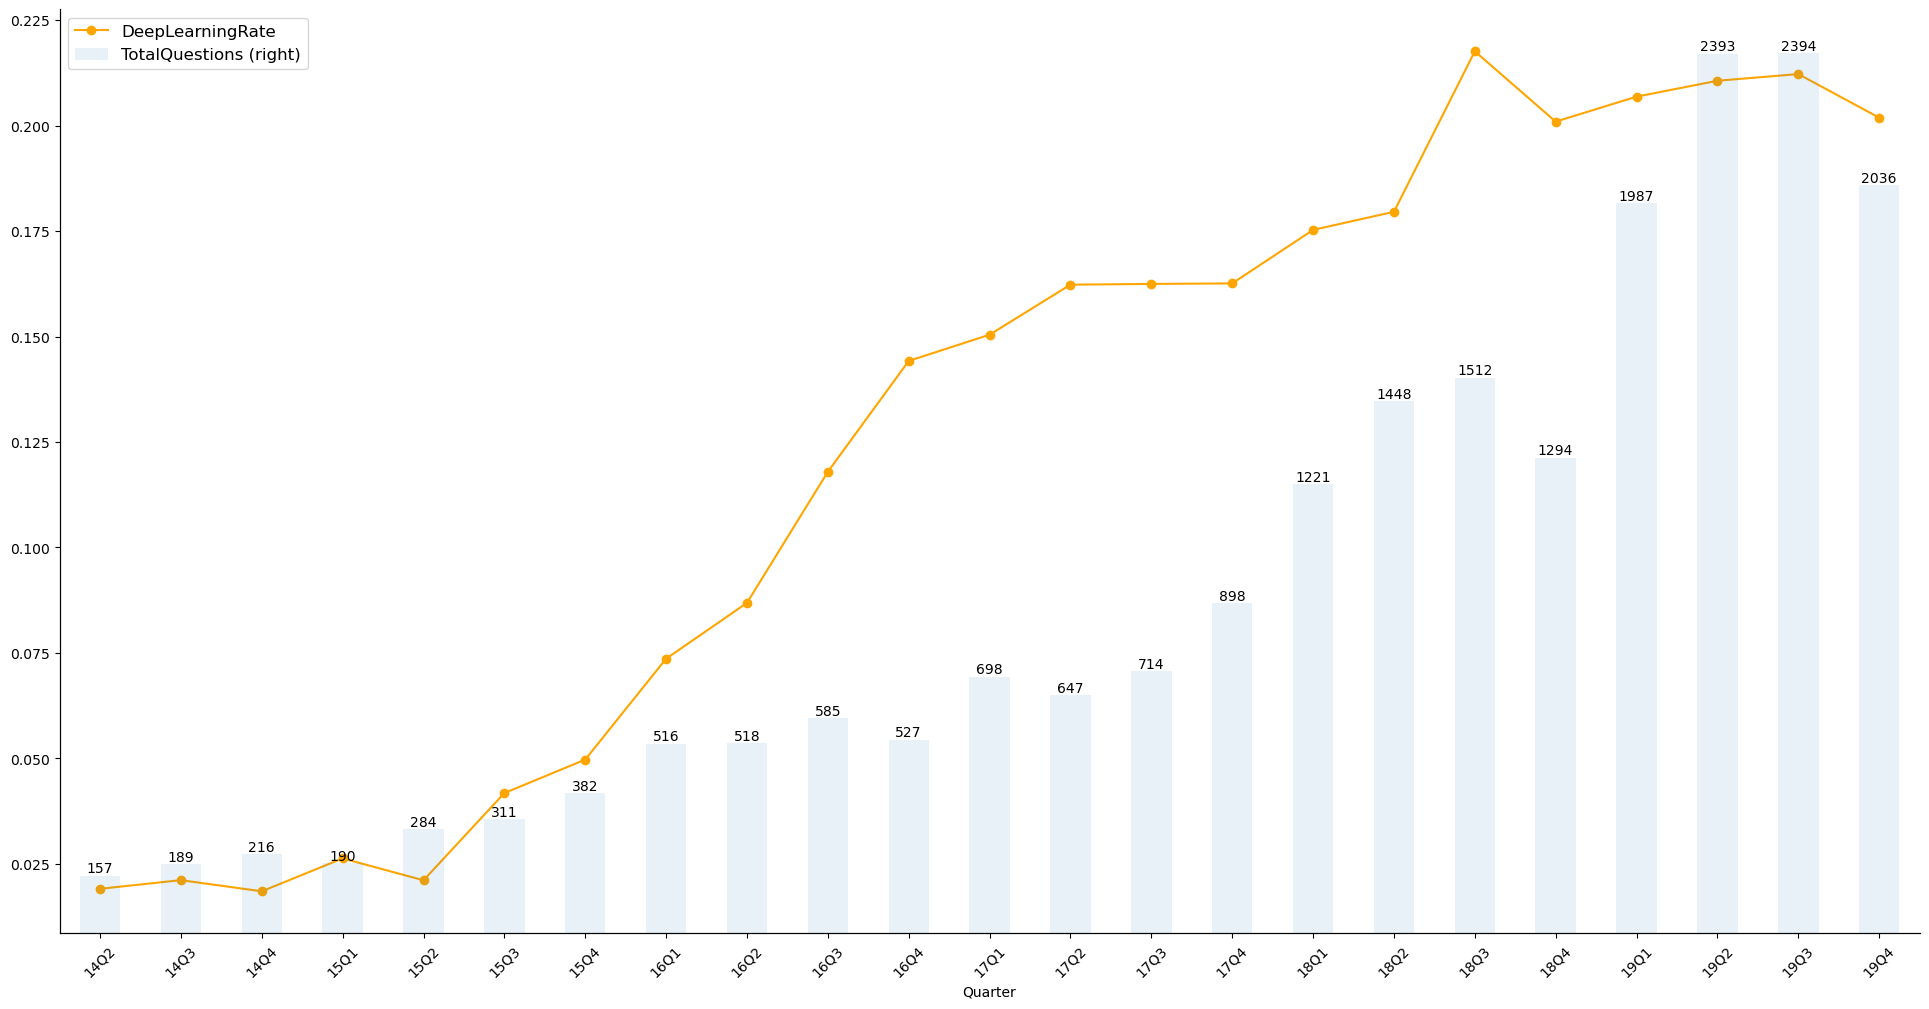

In [44]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions", kind="bar",
                     ax=ax1, secondary_y=True, alpha=0.1, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims=ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2, labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})

for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.

# Next Steps

Our work allowed us to conclude that deep learning is the most popular topic right now. Here are some things to consider:
- What other content can we recommend that isn't as popular? You can try using association rules to find strong relations between tags.
- What other popularity features could we include in our analysis? Perhaps scores and favourite counts?
- We focused on DSSE. How could we use other related sites to help us with our goal?
- How can we leverage other sites to determine what non-data-science content to write about? For example, is there some mathematical field that leads to more questions than others?

We encourage you to think of other questions and share your work with us!

Curious to see what other students have done on this project? Head over to our Community to check them out. While you are there, please remember to show some love and give your own feedback!

And of course, we welcome you to share your own project and show off your hard work. Head over to our Community to share your finished Guided Project!